In [74]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

from IPython.display import Image
from os import system

In [75]:
creditData = pd.read_csv('credit.csv')
creditData.head(10)

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes
5,unknown,36,good,education,9055,unknown,1 - 4 years,2,4,35,none,other,1,unskilled,2,yes,no
6,unknown,24,good,furniture/appliances,2835,500 - 1000 DM,> 7 years,3,4,53,none,own,1,skilled,1,no,no
7,1 - 200 DM,36,good,car,6948,< 100 DM,1 - 4 years,2,2,35,none,rent,1,management,1,yes,no
8,unknown,12,good,furniture/appliances,3059,> 1000 DM,4 - 7 years,2,4,61,none,own,1,unskilled,1,no,no
9,1 - 200 DM,30,critical,car,5234,< 100 DM,unemployed,4,2,28,none,own,2,management,1,no,yes


In [76]:
 creditData.shape

(1000, 17)

In [77]:
creditData.describe()

,months_loan_duration,amount,percent_of_income,years_at_residence,age,existing_loans_count,dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [78]:
creditData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   checking_balance      1000 non-null   object
 1   months_loan_duration  1000 non-null   int64 
 2   credit_history        1000 non-null   object
 3   purpose               1000 non-null   object
 4   amount                1000 non-null   int64 
 5   savings_balance       1000 non-null   object
 6   employment_duration   1000 non-null   object
 7   percent_of_income     1000 non-null   int64 
 8   years_at_residence    1000 non-null   int64 
 9   age                   1000 non-null   int64 
 10  other_credit          1000 non-null   object
 11  housing               1000 non-null   object
 12  existing_loans_count  1000 non-null   int64 
 13  job                   1000 non-null   object
 14  dependents            1000 non-null   int64 
 15  phone                 1000 non-null   o

In [79]:
for feature in creditData.columns:
    if creditData[feature].dtype == 'object':
        creditData[feature] = pd.Categorical(creditData[feature])
creditData.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes


In [80]:
print(creditData.checking_balance.value_counts())
print(creditData.credit_history.value_counts())
print(creditData.purpose.value_counts())
print(creditData.savings_balance.value_counts())
print(creditData.employment_duration.value_counts())
print(creditData.other_credit.value_counts())
print(creditData.housing.value_counts())
print(creditData.job.value_counts())
print(creditData.phone.value_counts())

unknown       394
< 0 DM        274
1 - 200 DM    269
> 200 DM       63
Name: checking_balance, dtype: int64
good         530
critical     293
poor          88
very good     49
perfect       40
Name: credit_history, dtype: int64
furniture/appliances    473
car                     337
business                 97
education                59
renovations              22
car0                     12
Name: purpose, dtype: int64
< 100 DM         603
unknown          183
100 - 500 DM     103
500 - 1000 DM     63
> 1000 DM         48
Name: savings_balance, dtype: int64
1 - 4 years    339
> 7 years      253
4 - 7 years    174
< 1 year       172
unemployed      62
Name: employment_duration, dtype: int64
none     814
bank     139
store     47
Name: other_credit, dtype: int64
own      713
rent     179
other    108
Name: housing, dtype: int64
skilled       630
unskilled     200
management    148
unemployed     22
Name: job, dtype: int64
no     596
yes    404
Name: phone, dtype: int64


In [81]:
replaceStruct = {
    'checking_balance': {"< 0 DM": 1, "1 - 200 DM":2, "> 200 DM":3, 'unknown':-1},
    'credit_history': {"critical":1, "poor":2, "good": 3,"very good":4, "perfect":5},
    'savings_balance': {"< 100 DM": 1, "100 - 500 DM":2, "500 - 1000 DM":3,"> 1000 DM":4, 'unknown':-1},
    'employment_duration': {"unemployed": 1, "< 1 year":2, "1 - 4 years":3, '4 - 7 years':4, '> 7 years':5},
    'phone': {"no": 1, "yes":2},
    'default': {"no": 0, "yes":1}
        }

oneHotCols = ["purpose","housing","other_credit","job"]

In [82]:
creditData = creditData.replace(replaceStruct)
creditData = pd.get_dummies(creditData, columns= oneHotCols)
creditData.head(10)

,checking_balance,months_loan_duration,credit_history,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,existing_loans_count,...,housing_other,housing_own,housing_rent,other_credit_bank,other_credit_none,other_credit_store,job_management,job_skilled,job_unemployed,job_unskilled
0,1,6,1,1169,-1,5,4,4,67,2,...,0,1,0,0,1,0,0,1,0,0
1,2,48,3,5951,1,3,2,2,22,1,...,0,1,0,0,1,0,0,1,0,0
2,-1,12,1,2096,1,4,2,3,49,1,...,0,1,0,0,1,0,0,0,0,1
3,1,42,3,7882,1,4,2,4,45,1,...,1,0,0,0,1,0,0,1,0,0
4,1,24,2,4870,1,3,3,4,53,2,...,1,0,0,0,1,0,0,1,0,0
5,-1,36,3,9055,-1,3,2,4,35,1,...,1,0,0,0,1,0,0,0,0,1
6,-1,24,3,2835,3,5,3,4,53,1,...,0,1,0,0,1,0,0,1,0,0
7,2,36,3,6948,1,3,2,2,35,1,...,0,0,1,0,1,0,1,0,0,0
8,-1,12,3,3059,4,4,2,4,61,1,...,0,1,0,0,1,0,0,0,0,1
9,2,30,1,5234,1,1,4,2,28,2,...,0,1,0,0,1,0,1,0,0,0


In [83]:
creditData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   checking_balance              1000 non-null   category
 1   months_loan_duration          1000 non-null   int64   
 2   credit_history                1000 non-null   category
 3   amount                        1000 non-null   int64   
 4   savings_balance               1000 non-null   category
 5   employment_duration           1000 non-null   category
 6   percent_of_income             1000 non-null   int64   
 7   years_at_residence            1000 non-null   int64   
 8   age                           1000 non-null   int64   
 9   existing_loans_count          1000 non-null   int64   
 10  dependents                    1000 non-null   int64   
 11  phone                         1000 non-null   category
 12  default                       1000 non-null   cat

## Split the data

In [85]:
X = creditData.drop('default', axis= 1)
y = creditData.pop('default')

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.30, random_state= 1)

## Build the Decision Tree Model

In [89]:
dTree = DecisionTreeClassifier(criterion= 'gini', random_state= 1)
dTree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [90]:
print(dTree.score(X_train, y_train))
print(dTree.score(X_test, y_test))

1.0
0.6933333333333334


- Over fitting on training data
- Since the test score (out of sample score) does not match the insample training score, the model does not generalize well.

In [91]:
def make_confusion_matrix(model, y_actual, labels = [1,0]):
    """
    model: classifier to predict the values of x
    y_actual: the ground truth
    """
    y_predict = model.predict(X_test)
    cm = metrics.confusion_matrix(y_actual, y_predict, labels = [0,1])
    df_cm = pd.DataFrame(cm, index = [i for i in ['Actual - No','Actual - Yes']],
                        columns = [i for i in ['Predicted - No', 'Predicted - Yes']])
    group_counts = ['{0:0.0f}'.format(value) for value in cm.flatten()]
    group_percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize=(10,7))
    sns.heatmap(df_cm, annot = labels, fmt= "")
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')

In [92]:
def get_recall_score(model):
    """
    model: classifier to predict values of X
    """
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    print("Recall on training set :", metrics.recall_score(y_train, pred_train))
    print("Recall on test set :", metrics.recall_score(y_test, pred_test))
    

## Printing the Confusion Matrix

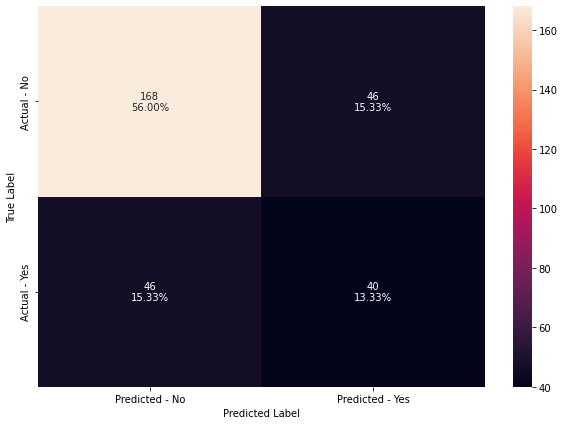

In [94]:
make_confusion_matrix(dTree, y_test)

In [95]:
#Recall on train and test
get_recall_score(dTree)

Recall on training set : 1.0
Recall on test set : 0.46511627906976744


## Visualizing the Decision Tree

In [96]:
feature_names = list(X.columns)
print(feature_names)

['checking_balance', 'months_loan_duration', 'credit_history', 'amount', 'savings_balance', 'employment_duration', 'percent_of_income', 'years_at_residence', 'age', 'existing_loans_count', 'dependents', 'phone', 'purpose_business', 'purpose_car', 'purpose_car0', 'purpose_education', 'purpose_furniture/appliances', 'purpose_renovations', 'housing_other', 'housing_own', 'housing_rent', 'other_credit_bank', 'other_credit_none', 'other_credit_store', 'job_management', 'job_skilled', 'job_unemployed', 'job_unskilled']


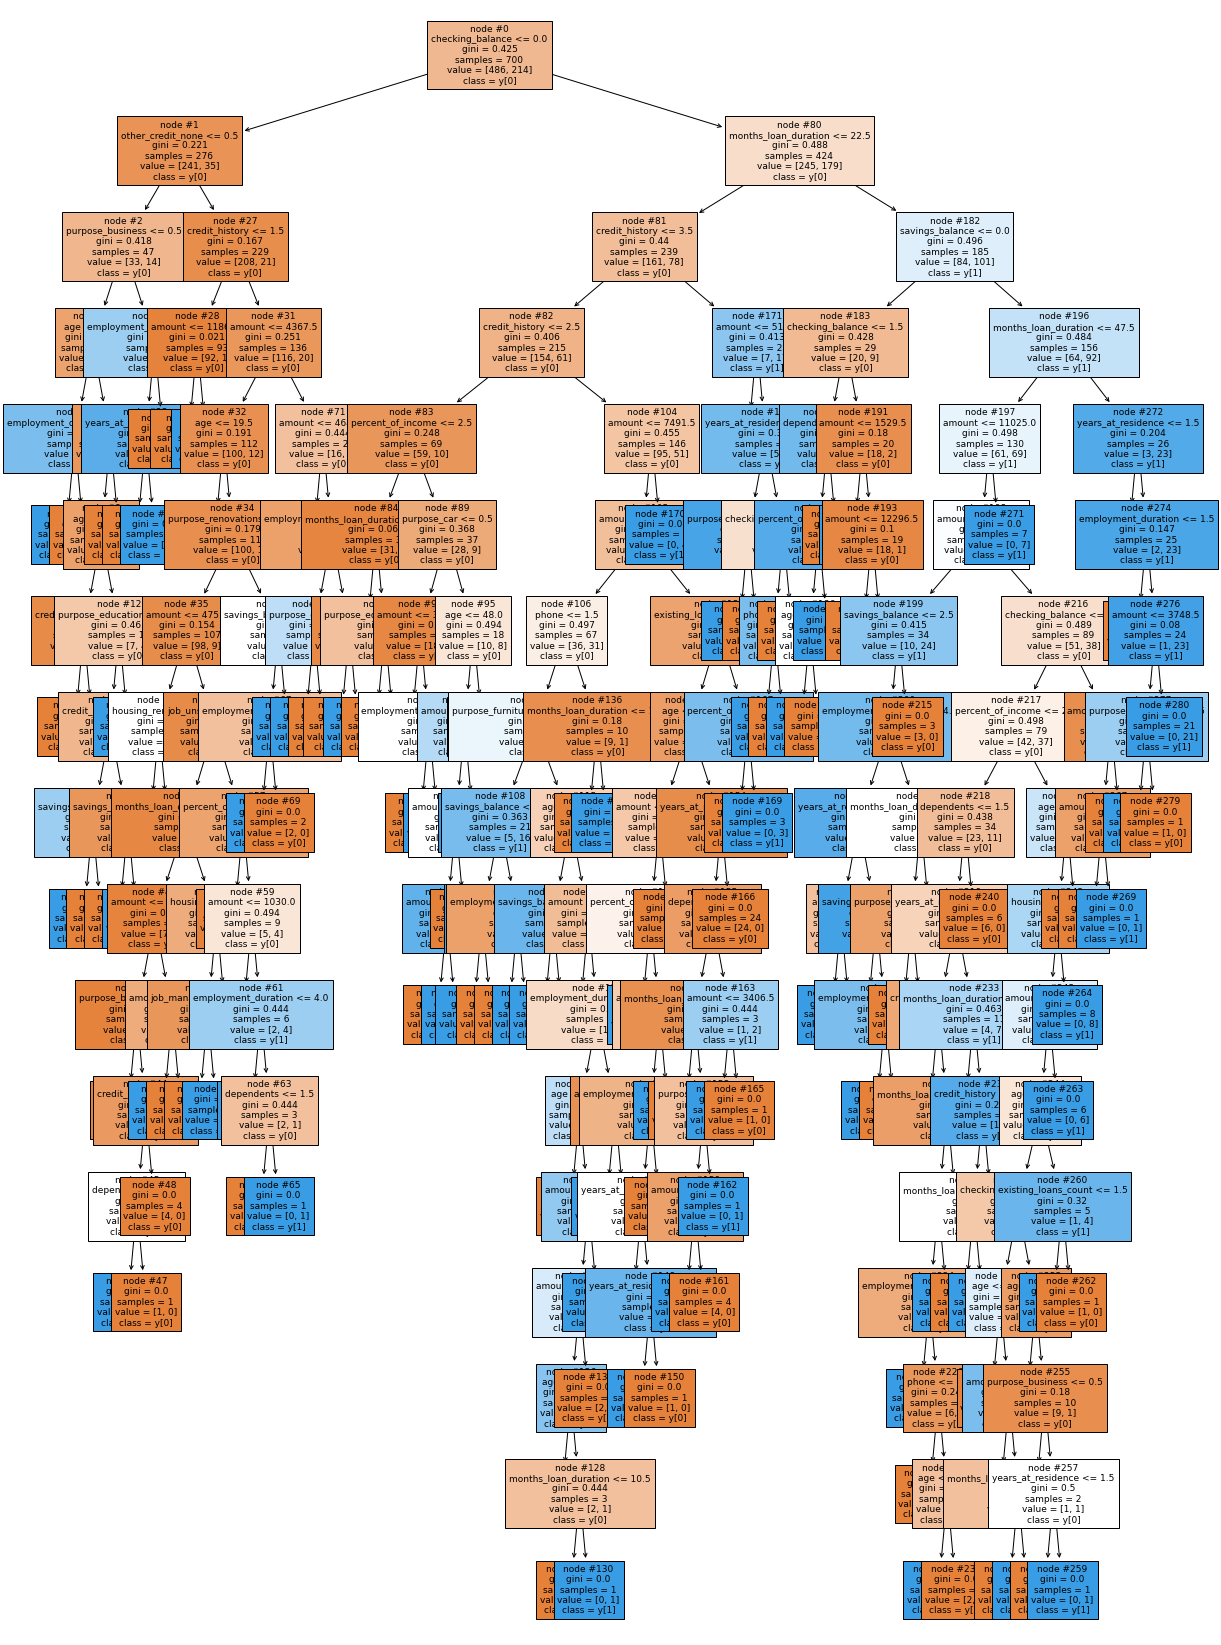

In [97]:
plt.figure(figsize= (20,30))
tree.plot_tree(dTree, feature_names=feature_names, filled = True, fontsize= 9, node_ids= True, class_names= True,);

In [98]:
print(tree.export_text(dTree, feature_names=feature_names, show_weights= True))

|--- checking_balance <= 0.00
|   |--- other_credit_none <= 0.50
|   |   |--- purpose_business <= 0.50
|   |   |   |--- age <= 25.50
|   |   |   |   |--- employment_duration <= 3.50
|   |   |   |   |   |--- weights: [0.00, 3.00] class: 1
|   |   |   |   |--- employment_duration >  3.50
|   |   |   |   |   |--- weights: [1.00, 0.00] class: 0
|   |   |   |--- age >  25.50
|   |   |   |   |--- age <= 38.50
|   |   |   |   |   |--- age <= 31.50
|   |   |   |   |   |   |--- credit_history <= 4.50
|   |   |   |   |   |   |   |--- weights: [13.00, 0.00] class: 0
|   |   |   |   |   |   |--- credit_history >  4.50
|   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |--- age >  31.50
|   |   |   |   |   |   |--- purpose_education <= 0.50
|   |   |   |   |   |   |   |--- credit_history <= 1.50
|   |   |   |   |   |   |   |   |--- savings_balance <= 2.50
|   |   |   |   |   |   |   |   |   |--- weights: [0.00, 2.00] class: 1
|   |   |   |   |   |   |   |   |--- sav

## Feature Importance

In [100]:
print(pd.DataFrame(dTree.feature_importances_, columns=['Imp'], index = X_train.columns).sort_values(by = 'Imp', ascending= False))

                                   Imp
amount                        0.204163
checking_balance              0.136840
age                           0.110746
months_loan_duration          0.100323
employment_duration           0.073225
credit_history                0.065357
savings_balance               0.057059
years_at_residence            0.052719
percent_of_income             0.034128
purpose_business              0.023784
dependents                    0.023062
purpose_car                   0.021217
phone                         0.016737
housing_rent                  0.016646
purpose_education             0.013767
existing_loans_count          0.013575
purpose_furniture/appliances  0.012421
other_credit_none             0.011156
job_management                0.005769
purpose_renovations           0.004489
job_unskilled                 0.002818
other_credit_bank             0.000000
housing_own                   0.000000
other_credit_store            0.000000
housing_other            

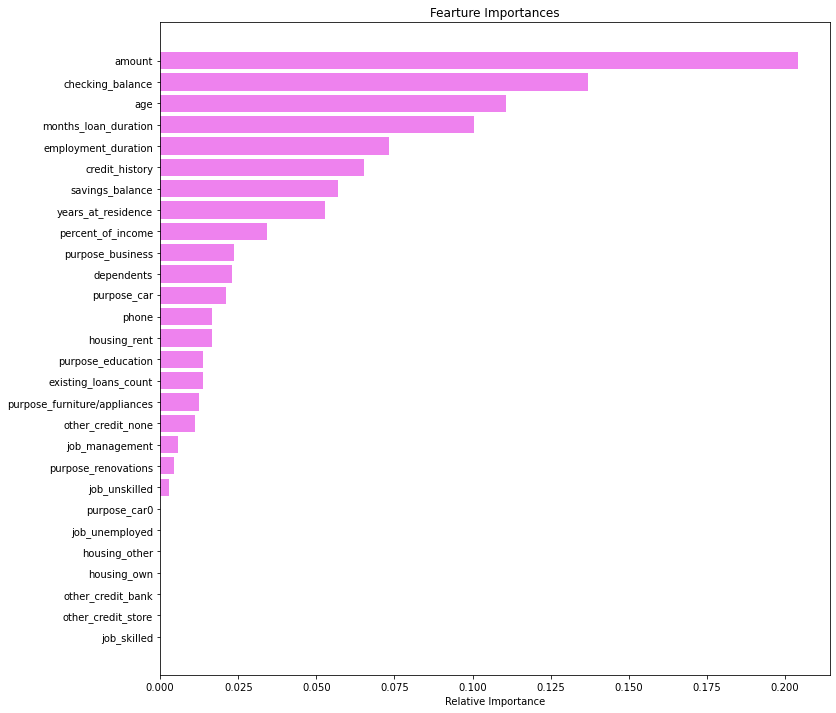

In [102]:
importances = dTree.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Fearture Importances')
plt.barh(range(len(indices)), importances[indices], color = 'violet',align= 'center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Reducing Overfitting

### Pre Pruning

In [103]:
dTree1 = DecisionTreeClassifier(criterion='gini', max_depth= 3, random_state= 1)
dTree1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=1)

## Confusion Matrix for DT with a max depth of 3

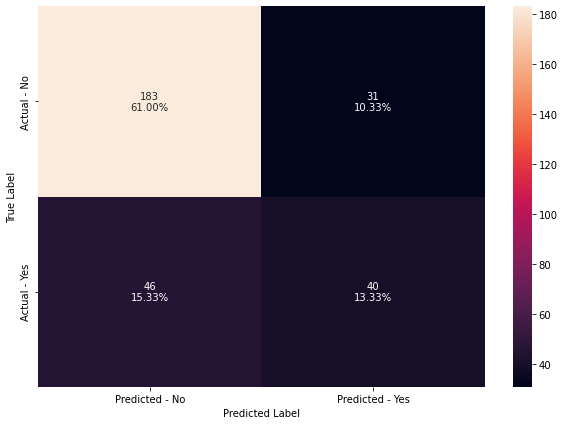

In [104]:
make_confusion_matrix(dTree1, y_test)

In [105]:
print(dTree1.score(X_train, y_train))
print(dTree1.score(X_test, y_test))

0.7528571428571429
0.7433333333333333


In [107]:
get_recall_score(dTree1)

Recall on training set : 0.5373831775700935
Recall on test set : 0.46511627906976744


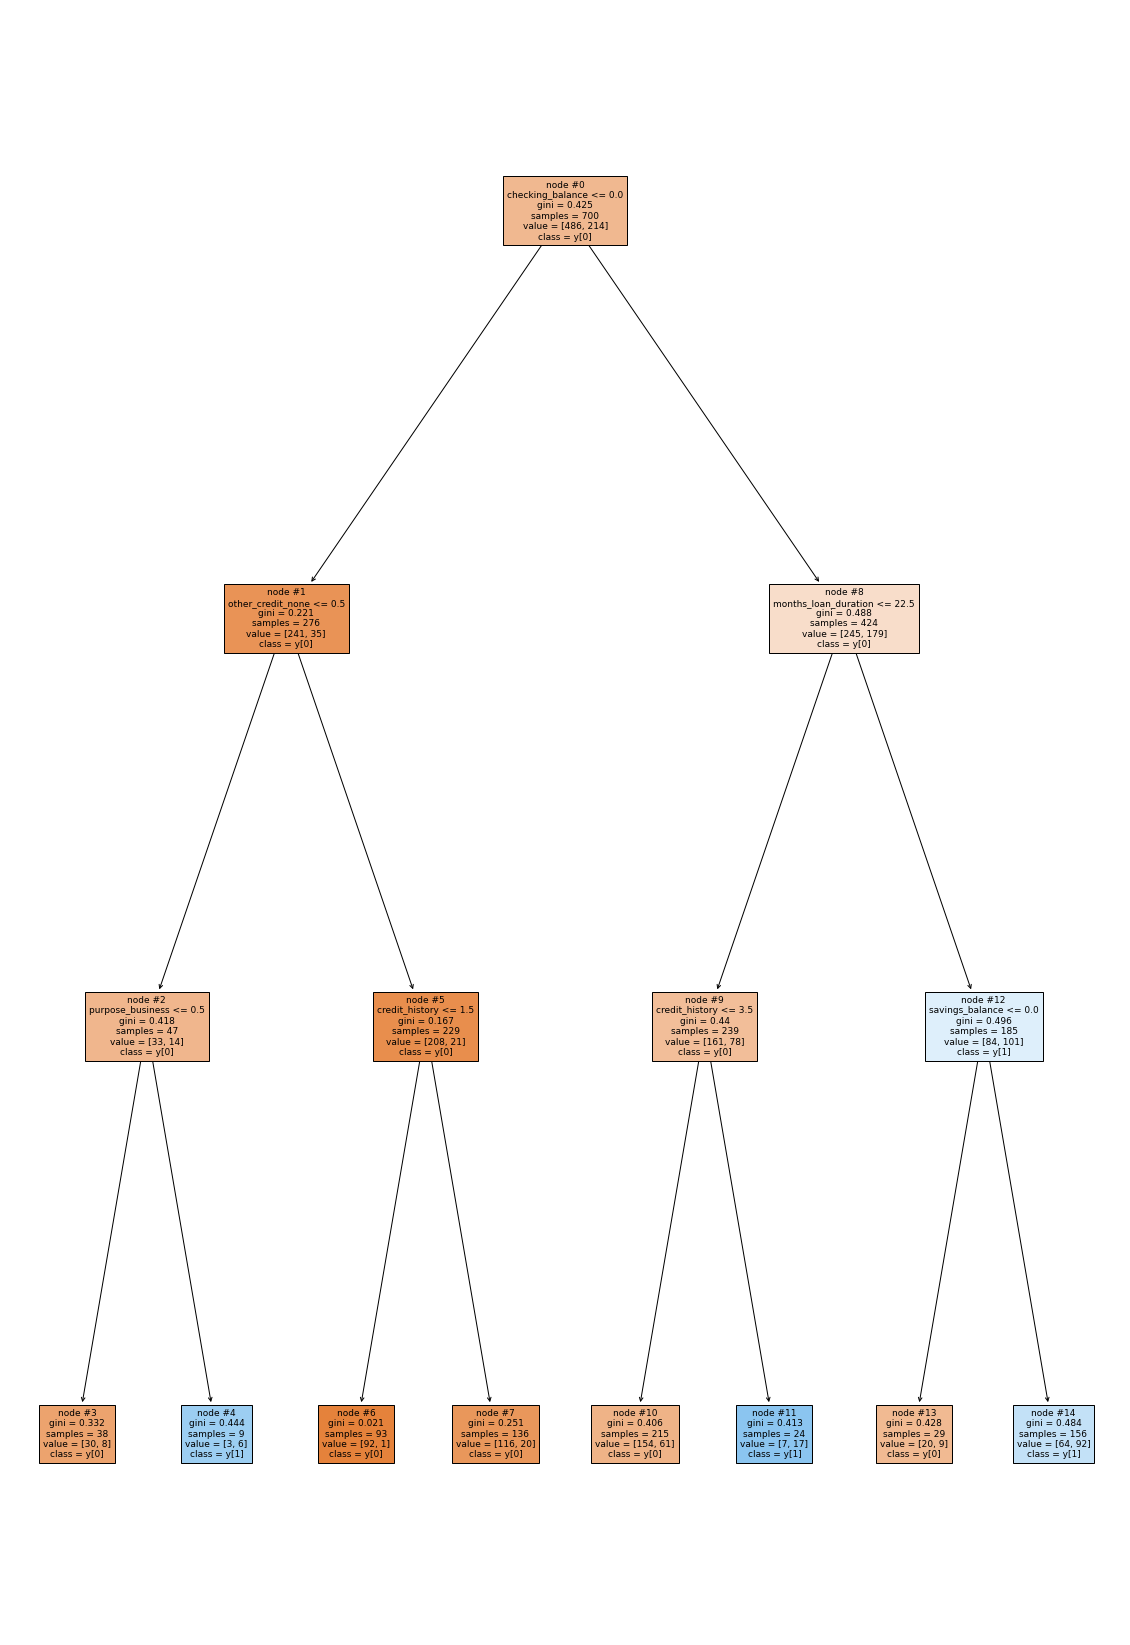

In [108]:
plt.figure(figsize= (20,30))
tree.plot_tree(dTree1, feature_names=feature_names, filled = True, fontsize= 9, node_ids= True, class_names= True,);

In [109]:
print(tree.export_text(dTree1, feature_names=feature_names, show_weights= True))

|--- checking_balance <= 0.00
|   |--- other_credit_none <= 0.50
|   |   |--- purpose_business <= 0.50
|   |   |   |--- weights: [30.00, 8.00] class: 0
|   |   |--- purpose_business >  0.50
|   |   |   |--- weights: [3.00, 6.00] class: 1
|   |--- other_credit_none >  0.50
|   |   |--- credit_history <= 1.50
|   |   |   |--- weights: [92.00, 1.00] class: 0
|   |   |--- credit_history >  1.50
|   |   |   |--- weights: [116.00, 20.00] class: 0
|--- checking_balance >  0.00
|   |--- months_loan_duration <= 22.50
|   |   |--- credit_history <= 3.50
|   |   |   |--- weights: [154.00, 61.00] class: 0
|   |   |--- credit_history >  3.50
|   |   |   |--- weights: [7.00, 17.00] class: 1
|   |--- months_loan_duration >  22.50
|   |   |--- savings_balance <= 0.00
|   |   |   |--- weights: [20.00, 9.00] class: 0
|   |   |--- savings_balance >  0.00
|   |   |   |--- weights: [64.00, 92.00] class: 1



In [110]:
print(pd.DataFrame(dTree1.feature_importances_, columns=['Imp'], index = X_train.columns).sort_values(by = 'Imp', ascending= False))

                                   Imp
checking_balance              0.492510
months_loan_duration          0.169806
credit_history                0.166109
savings_balance               0.064467
other_credit_none             0.055977
purpose_business              0.051129
purpose_furniture/appliances  0.000000
job_unemployed                0.000000
job_skilled                   0.000000
job_management                0.000000
other_credit_store            0.000000
other_credit_bank             0.000000
housing_rent                  0.000000
housing_own                   0.000000
housing_other                 0.000000
purpose_renovations           0.000000
purpose_car0                  0.000000
purpose_education             0.000000
purpose_car                   0.000000
phone                         0.000000
dependents                    0.000000
existing_loans_count          0.000000
age                           0.000000
years_at_residence            0.000000
percent_of_income        

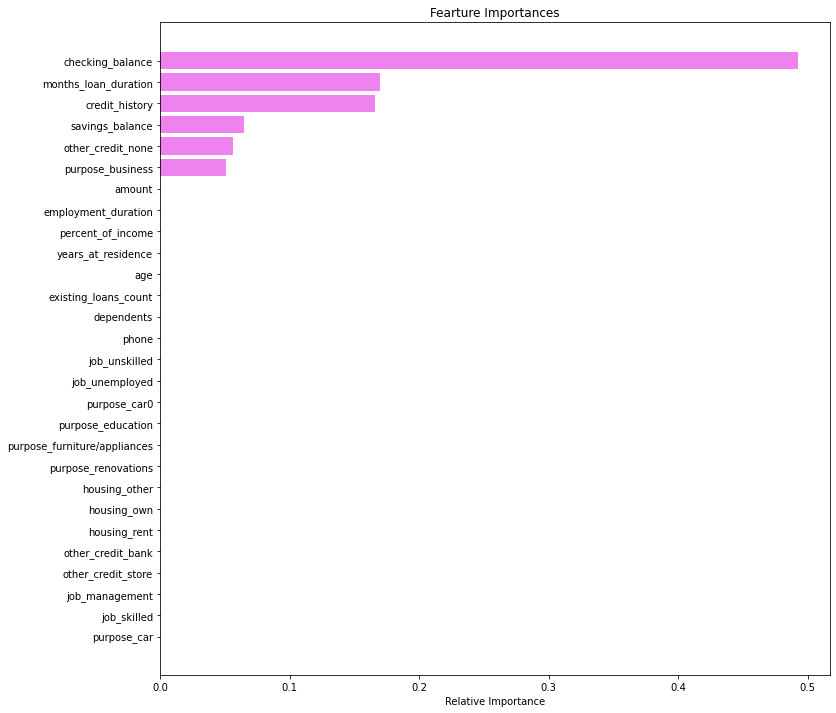

In [111]:
importances = dTree1.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Fearture Importances')
plt.barh(range(len(indices)), importances[indices], color = 'violet',align= 'center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Using Grid Search for Hyperparametr tuning of the tree model

In [112]:
from sklearn.model_selection import GridSearchCV

In [113]:
estimator = DecisionTreeClassifier(random_state= 1)

#Grid Parameters to iterate through
parameters = {
    'max_depth': np.arange(1,10),
    'min_samples_leaf': [1,2,5,7,10,15,20],
    'max_leaf_nodes':[2,3,5,10],
    'min_impurity_decrease':[0.001,0.01,0.1]
    }

#Type of scoring to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

#Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring= acc_scorer, cv = 5)
grid_obj = grid_obj.fit(X_train, y_train)

#select and set the best combination of parameters
estimator = grid_obj.best_estimator_
estimator.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, max_leaf_nodes=10,
                       min_impurity_decrease=0.001, min_samples_leaf=20,
                       random_state=1)

## Confusion matrix with tuned hyper parameters

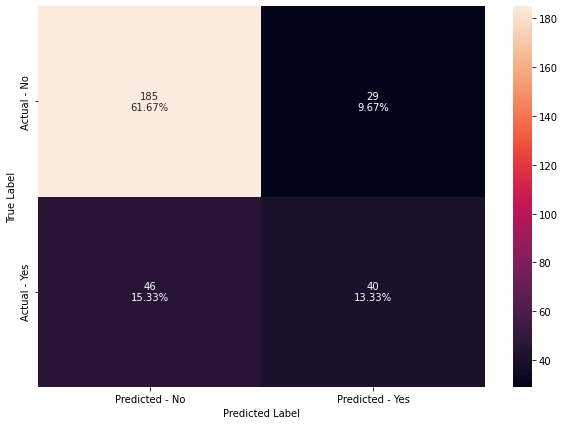

In [114]:
make_confusion_matrix(estimator, y_test)

In [117]:
print(estimator.score(X_train, y_train))
print(estimator.score(X_test, y_test))

0.7485714285714286
0.75


In [118]:
get_recall_score(estimator)

Recall on training set : 0.5093457943925234
Recall on test set : 0.46511627906976744


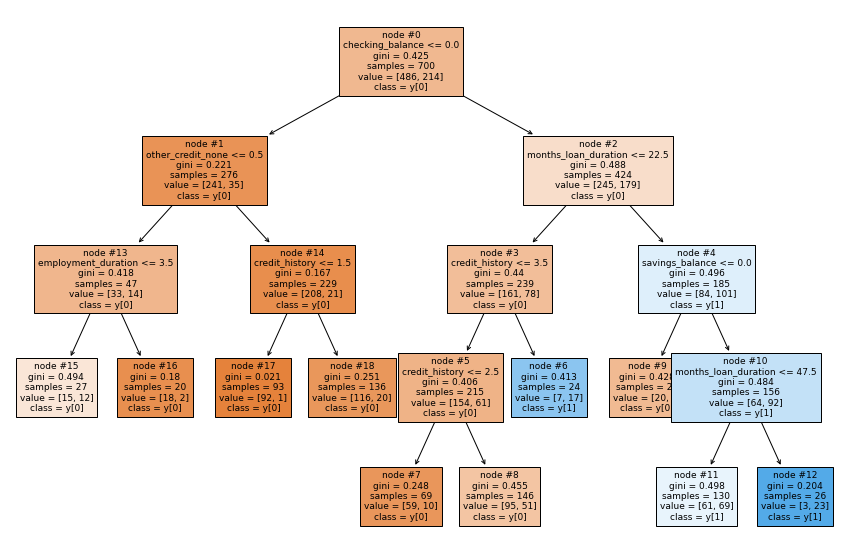

In [119]:
plt.figure(figsize= (15,10))
tree.plot_tree(estimator, feature_names=feature_names, filled = True, fontsize= 9, node_ids= True, class_names= True,);

In [120]:
print(tree.export_text(estimator, feature_names=feature_names, show_weights= True))

|--- checking_balance <= 0.00
|   |--- other_credit_none <= 0.50
|   |   |--- employment_duration <= 3.50
|   |   |   |--- weights: [15.00, 12.00] class: 0
|   |   |--- employment_duration >  3.50
|   |   |   |--- weights: [18.00, 2.00] class: 0
|   |--- other_credit_none >  0.50
|   |   |--- credit_history <= 1.50
|   |   |   |--- weights: [92.00, 1.00] class: 0
|   |   |--- credit_history >  1.50
|   |   |   |--- weights: [116.00, 20.00] class: 0
|--- checking_balance >  0.00
|   |--- months_loan_duration <= 22.50
|   |   |--- credit_history <= 3.50
|   |   |   |--- credit_history <= 2.50
|   |   |   |   |--- weights: [59.00, 10.00] class: 0
|   |   |   |--- credit_history >  2.50
|   |   |   |   |--- weights: [95.00, 51.00] class: 0
|   |   |--- credit_history >  3.50
|   |   |   |--- weights: [7.00, 17.00] class: 1
|   |--- months_loan_duration >  22.50
|   |   |--- savings_balance <= 0.00
|   |   |   |--- weights: [20.00, 9.00] class: 0
|   |   |--- savings_balance >  0.00
|   |  

In [121]:
print(pd.DataFrame(estimator.feature_importances_, columns=['Imp'], index = X_train.columns).sort_values(by = 'Imp', ascending= False))

                                   Imp
checking_balance              0.427296
months_loan_duration          0.226805
credit_history                0.201464
savings_balance               0.055931
other_credit_none             0.048565
employment_duration           0.039938
purpose_furniture/appliances  0.000000
job_unemployed                0.000000
job_skilled                   0.000000
job_management                0.000000
other_credit_store            0.000000
other_credit_bank             0.000000
housing_rent                  0.000000
housing_own                   0.000000
housing_other                 0.000000
purpose_renovations           0.000000
purpose_car0                  0.000000
purpose_education             0.000000
purpose_car                   0.000000
purpose_business              0.000000
phone                         0.000000
dependents                    0.000000
existing_loans_count          0.000000
age                           0.000000
years_at_residence       

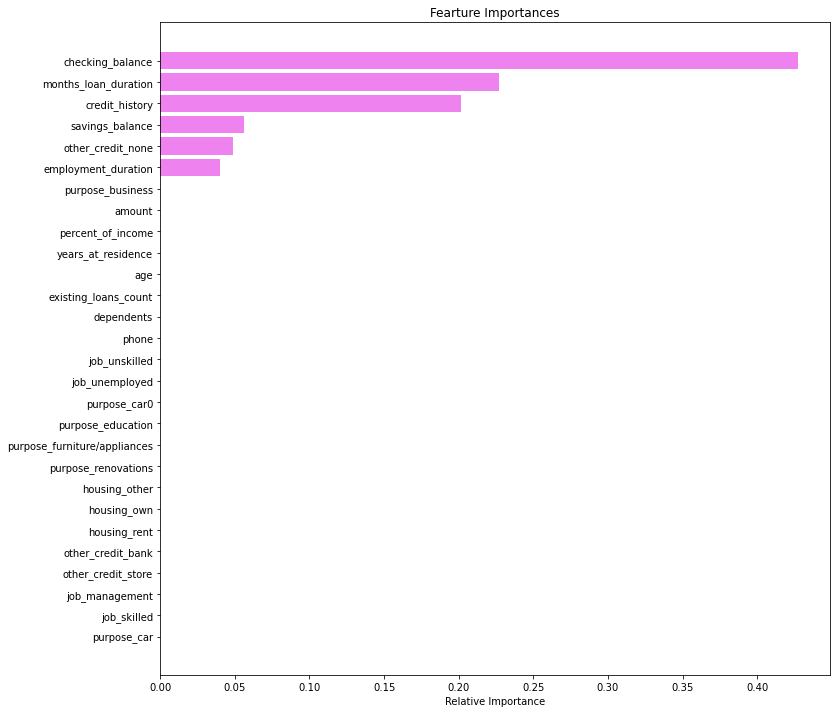

In [122]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Fearture Importances')
plt.barh(range(len(indices)), importances[indices], color = 'violet',align= 'center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Post pruning

### Cost complexity pruning

In [123]:
clf = DecisionTreeClassifier(random_state= 1)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [124]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000,0.000000
1,0.000940,0.002819
2,0.001224,0.005268
3,0.001250,0.007768
4,0.001250,0.010268
...,...,...
73,0.005618,0.335998
74,0.007117,0.357350
75,0.011122,0.368471
76,0.014366,0.382838


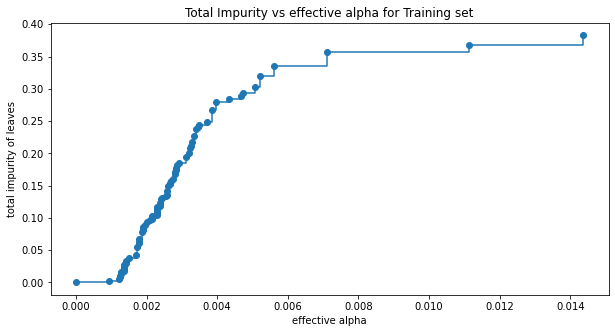

In [125]:
fig, ax= plt.subplots(figsize=(10,5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker = 'o', drawstyle = 'steps-post')
ax.set_xlabel('effective alpha')
ax.set_ylabel('total impurity of leaves')
ax.set_title('Total Impurity vs effective alpha for Training set')
plt.show()

In [126]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha= ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
    
print('Number of node in the last Tree is: {} with ccp_alpha: {}'.format(clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of node in the last Tree is: 1 with ccp_alpha: 0.041668413944741134


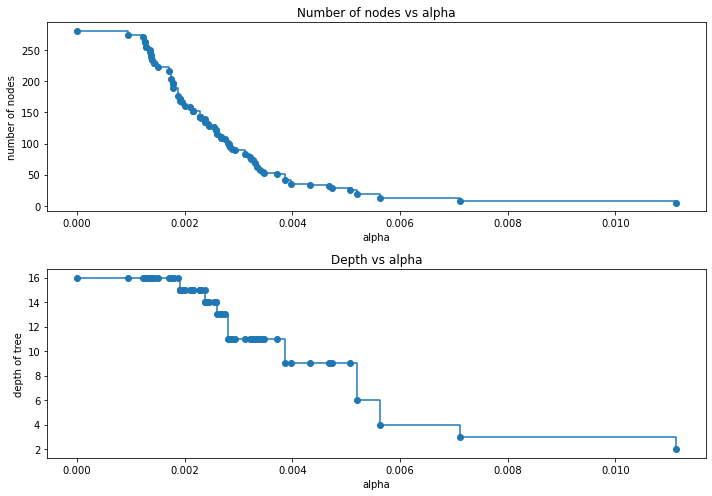

In [128]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2,1,figsize=(10,7))
ax[0].plot(ccp_alphas, node_counts, marker = 'o', drawstyle = 'steps-post')
ax[0].set_xlabel('alpha')
ax[0].set_ylabel('number of nodes')
ax[0].set_title('Number of nodes vs alpha')

ax[1].plot(ccp_alphas, depth, marker = 'o', drawstyle = 'steps-post')
ax[1].set_xlabel('alpha')
ax[1].set_ylabel('depth of tree')
ax[1].set_title('Depth vs alpha')
fig.tight_layout()

In [129]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

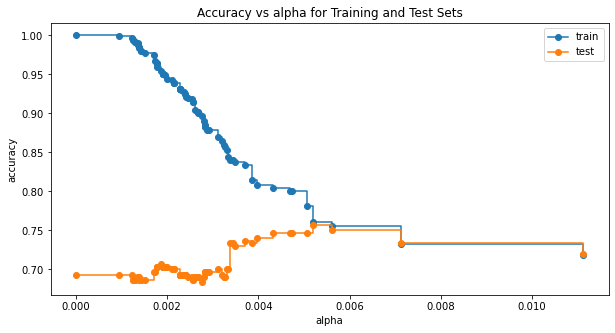

In [130]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(ccp_alphas, train_scores, marker = 'o', label = 'train', drawstyle = 'steps-post')
ax.set_xlabel('alpha')
ax.set_ylabel('accuracy')
ax.set_title('Accuracy vs alpha for Training and Test Sets')
ax.plot(ccp_alphas, test_scores, marker = 'o', label = 'test', drawstyle = 'steps-post')
ax.legend()
plt.show()

In [131]:
index_best_model= np.argmax(test_scores)
best_model = clfs[index_best_model]
print(best_model)
print('Training accuracy of best model:', best_model.score(X_train, y_train))
print('Test accuracy of best model:', best_model.score(X_test, y_test))

DecisionTreeClassifier(ccp_alpha=0.005203486535576088, random_state=1)
Training accuracy of best model: 0.7614285714285715
Test accuracy of best model: 0.7566666666666667


## Using recall instead of accuracy to get the best model

In [132]:
recall_train = []
for clf in clfs:
    pred_train3 = clf.predict(X_train)
    values_train = metrics.recall_score(y_train, pred_train3)
    recall_train.append(values_train)

In [133]:
recall_test = []
for clf in clfs:
    pred_test3 = clf.predict(X_test)
    values_test = metrics.recall_score(y_test, pred_test3)
    recall_test.append(values_test)

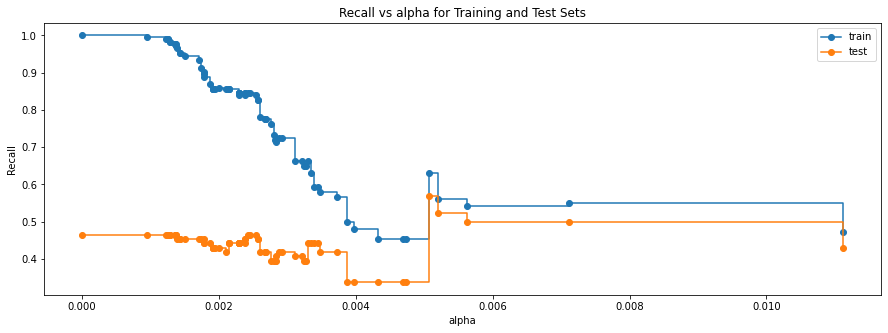

In [135]:
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(ccp_alphas, recall_train, marker = 'o', label = 'train', drawstyle = 'steps-post')
ax.set_xlabel('alpha')
ax.set_ylabel('Recall')
ax.set_title('Recall vs alpha for Training and Test Sets')
ax.plot(ccp_alphas, recall_test, marker = 'o', label = 'test', drawstyle = 'steps-post')
ax.legend()
plt.show()

In [137]:
index_best_model= np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.0050611694980498625, random_state=1)


### Confusion Matrix Post pruned DT

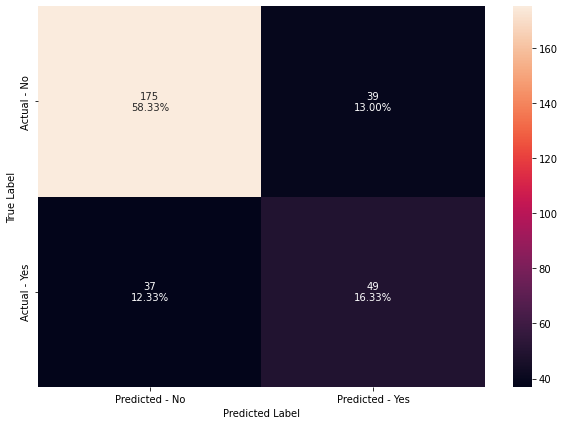

In [138]:
make_confusion_matrix(best_model, y_test)

In [139]:
get_recall_score(best_model)

Recall on training set : 0.6308411214953271
Recall on test set : 0.5697674418604651


## Visualizing the post pruned DT

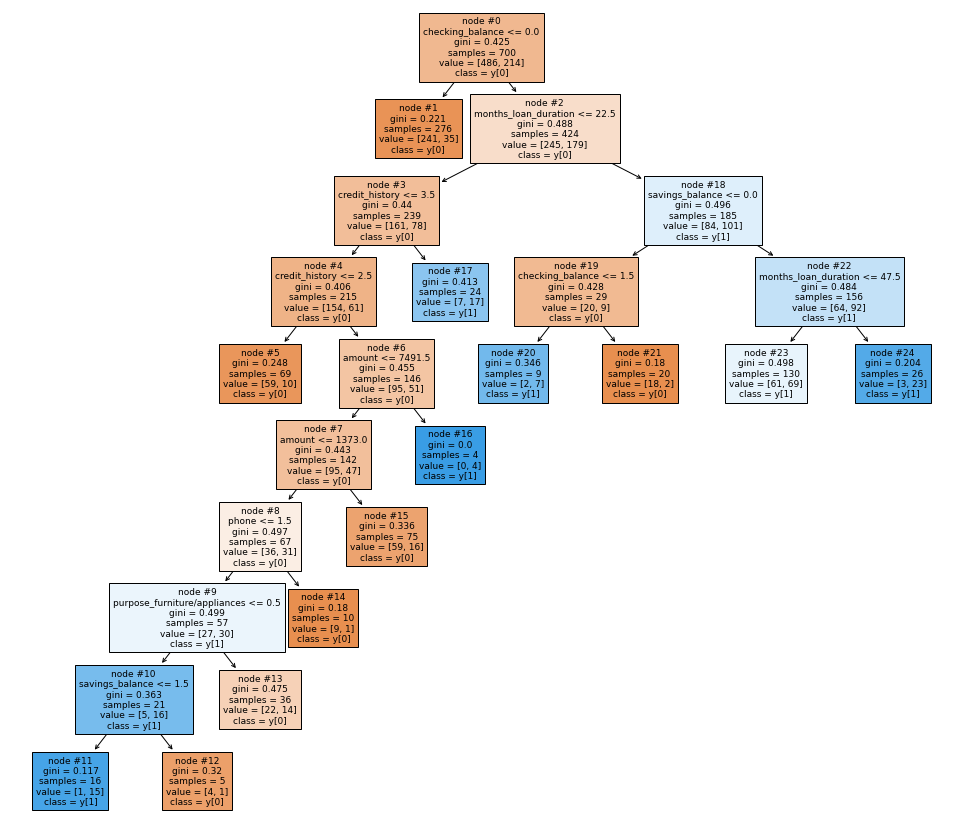

In [141]:
plt.figure(figsize= (17,15))
tree.plot_tree(best_model, feature_names=feature_names, filled = True, fontsize= 9, node_ids= True, class_names= True);

In [142]:
print(tree.export_text(best_model, feature_names=feature_names, show_weights= True))

|--- checking_balance <= 0.00
|   |--- weights: [241.00, 35.00] class: 0
|--- checking_balance >  0.00
|   |--- months_loan_duration <= 22.50
|   |   |--- credit_history <= 3.50
|   |   |   |--- credit_history <= 2.50
|   |   |   |   |--- weights: [59.00, 10.00] class: 0
|   |   |   |--- credit_history >  2.50
|   |   |   |   |--- amount <= 7491.50
|   |   |   |   |   |--- amount <= 1373.00
|   |   |   |   |   |   |--- phone <= 1.50
|   |   |   |   |   |   |   |--- purpose_furniture/appliances <= 0.50
|   |   |   |   |   |   |   |   |--- savings_balance <= 1.50
|   |   |   |   |   |   |   |   |   |--- weights: [1.00, 15.00] class: 1
|   |   |   |   |   |   |   |   |--- savings_balance >  1.50
|   |   |   |   |   |   |   |   |   |--- weights: [4.00, 1.00] class: 0
|   |   |   |   |   |   |   |--- purpose_furniture/appliances >  0.50
|   |   |   |   |   |   |   |   |--- weights: [22.00, 14.00] class: 0
|   |   |   |   |   |   |--- phone >  1.50
|   |   |   |   |   |   |   |--- weights: [

In [143]:
print(pd.DataFrame(best_model.feature_importances_, columns=['Imp'], index = X_train.columns).sort_values(by = 'Imp', ascending= False))

                                   Imp
checking_balance              0.411788
months_loan_duration          0.182828
credit_history                0.138164
savings_balance               0.094024
amount                        0.093092
purpose_furniture/appliances  0.043586
phone                         0.036518
job_skilled                   0.000000
job_management                0.000000
purpose_renovations           0.000000
other_credit_none             0.000000
other_credit_bank             0.000000
housing_rent                  0.000000
housing_own                   0.000000
job_unemployed                0.000000
housing_other                 0.000000
other_credit_store            0.000000
purpose_car0                  0.000000
purpose_education             0.000000
purpose_car                   0.000000
purpose_business              0.000000
dependents                    0.000000
existing_loans_count          0.000000
age                           0.000000
years_at_residence       

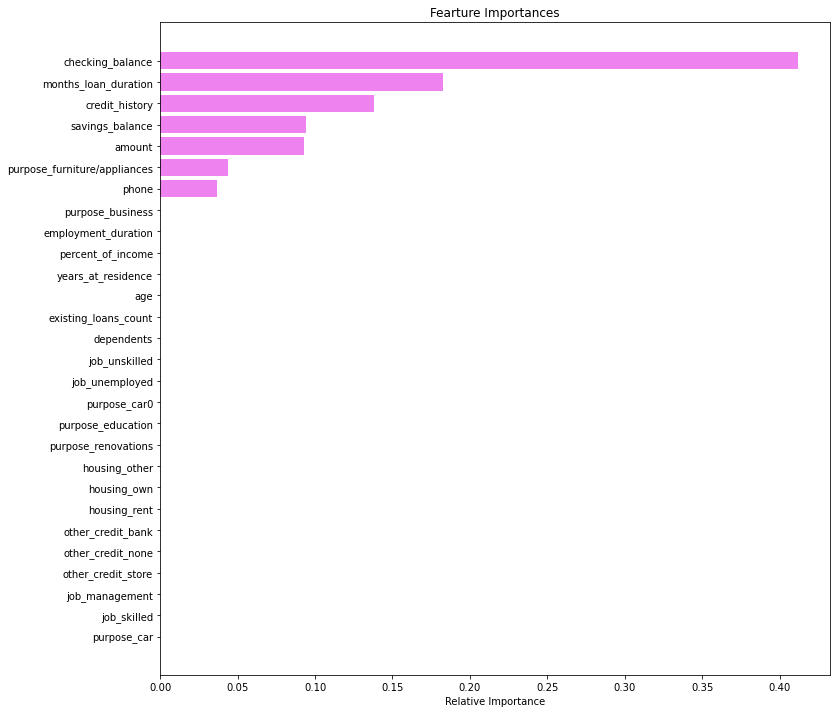

In [144]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Fearture Importances')
plt.barh(range(len(indices)), importances[indices], color = 'violet',align= 'center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Comparing All the DT Models

In [145]:
comparison_frame = pd.DataFrame({'Model': ['Initial decision tree model','Decision tree with restricted maximum depth','Decision tree with hyper parameter tuning','Decision tree with post pruning'], 'Train_Recall':[1,0.53,0.56, 0.63],'Test Recall':[0.46,0.46,0.52,0.56]})

comparison_frame

,Model,Train_Recall,Test Recall
0,Initial decision tree model,1.00,0.46
1,Decision tree with restricted maximum depth,0.53,0.46
2,Decision tree with hyper parameter tuning,0.56,0.52
3,Decision tree with post pruning,0.63,0.56


**Decision Tree with post pruning gives the best test score**